## Nama: Muhammad Zhafar Al Fathi
## NIM: 21.11.4374
## Kelas: 21-IF-08

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=faefdcd7d2e6113e6a36c369468581b3834638f3f8c9966082efd2bcbfd4f2e6
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

## 1. Dengan menggunakan Python dan Spark, unduh dataset berikut ini https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube/data (SCPMK 1534103 point 20)
### Panggil dan tampilkan lima baris pertama dari dataset tersebut, lalu buat program untuk memeriksa tipe data dari masing-masing kolom, menghitung jumlah null, mendapatkan nilai deskripsi secara umum, dan melakukan perbaikan pada penamaan kolom.

In [5]:
import pandas as pd

### Membaca csv melalui pandas dikarenakan jika langsung lewat spark akan terjadi error

In [6]:
pandas_df = pd.read_csv('/content/drive/MyDrive/File Kuliah/Tugas/Semester 5/Big Data & Predictive Analytics Lanjut/Spotify_Youtube.csv')
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

### Melakukan Konversi dari dataframe pandas ke pyspark

In [7]:
from pyspark.sql.types import StructType, StructField, IntegerType, DoubleType, StringType

# Membuat schema (blueprint) supaya spark mengetahui kolom dan apa saja yang ada di dataframe
schema = StructType([
    StructField("Number", IntegerType(), True),
    StructField("Artist", StringType(), True),
    StructField("Url_spotify", StringType(), True),
    StructField("Track", StringType(), True),
    StructField("Album", StringType(), True),
    StructField("Album_type", StringType(), True),
    StructField("Uri", StringType(), True),
    StructField("Danceability", DoubleType(), True),
    StructField("Energy", DoubleType(), True),
    StructField("Key", DoubleType(), True),
    StructField("Loudness", DoubleType(), True),
    StructField("Speechiness", DoubleType(), True),
    StructField("Acousticness", DoubleType(), True),
    StructField("Instrumentalness", DoubleType(), True),
    StructField("Liveness", DoubleType(), True),
    StructField("Valence", DoubleType(), True),
    StructField("Tempo", DoubleType(), True),
    StructField("Duration_ms", DoubleType(), True),
    StructField("Url_youtube", StringType(), True),
    StructField("Title", StringType(), True),
    StructField("Channel", StringType(), True),
    StructField("Views", DoubleType(), True),
    StructField("Likes", DoubleType(), True),
    StructField("Comments", DoubleType(), True),
    StructField("Description", StringType(), True),
    StructField("Licensed", StringType(), True),
    StructField("official_video", StringType(), True),
    StructField("Stream", DoubleType(), True)
])

# Load your Pandas DataFrame into a PySpark DataFrame with the specified schema
spark_df = spark.createDataFrame(pandas_df, schema=schema)

### Melakukan drop pada kolom "Description" karena kolom tidak diperlukan dan bikin lemot

In [8]:
spark_df = spark_df.drop("Description")

### Menampilkan 5 baris pertama dataframe

In [9]:
spark_df.show(5)

+------+--------+--------------------+--------------------+--------------------+----------+--------------------+------------+------+----+--------+-----------+------------+----------------+--------+-------+-------+-----------+--------------------+--------------------+--------+------------+---------+--------+--------+--------------+-------------+
|Number|  Artist|         Url_spotify|               Track|               Album|Album_type|                 Uri|Danceability|Energy| Key|Loudness|Speechiness|Acousticness|Instrumentalness|Liveness|Valence|  Tempo|Duration_ms|         Url_youtube|               Title| Channel|       Views|    Likes|Comments|Licensed|official_video|       Stream|
+------+--------+--------------------+--------------------+--------------------+----------+--------------------+------------+------+----+--------+-----------+------------+----------------+--------+-------+-------+-----------+--------------------+--------------------+--------+------------+---------+-------

### Deskripsi Umum

In [10]:
spark_df.describe().show()

+-------+----------------+--------+--------------------+----------------------+----------------------------------+----------+--------------------+------------+-------+-----+--------+-----------+------------+----------------+--------+-------+-----+-----------+--------------------+--------------------+--------------------+-----+-----+--------+--------+--------------+------+
|summary|          Number|  Artist|         Url_spotify|                 Track|                             Album|Album_type|                 Uri|Danceability| Energy|  Key|Loudness|Speechiness|Acousticness|Instrumentalness|Liveness|Valence|Tempo|Duration_ms|         Url_youtube|               Title|             Channel|Views|Likes|Comments|Licensed|official_video|Stream|
+-------+----------------+--------+--------------------+----------------------+----------------------------------+----------+--------------------+------------+-------+-----+--------+-----------+------------+----------------+--------+-------+-----+---

### Mengetahui tipe data dan jumlah null pada tiap kolom

In [11]:
from pyspark.sql.functions import col, isnan, when, count
column_data_types = spark_df.dtypes

for column_name, data_type in column_data_types:
  null_count = spark_df.select(count(when(isnan(column_name) | col(column_name).isNull(), column_name))).collect()[0][0]
  print(f"Kolom '{column_name}' tipe datanya adalah '{data_type}', jumlah null: {null_count}")

Kolom 'Number' tipe datanya adalah 'int', jumlah null: 0
Kolom 'Artist' tipe datanya adalah 'string', jumlah null: 0
Kolom 'Url_spotify' tipe datanya adalah 'string', jumlah null: 0
Kolom 'Track' tipe datanya adalah 'string', jumlah null: 0
Kolom 'Album' tipe datanya adalah 'string', jumlah null: 0
Kolom 'Album_type' tipe datanya adalah 'string', jumlah null: 0
Kolom 'Uri' tipe datanya adalah 'string', jumlah null: 0
Kolom 'Danceability' tipe datanya adalah 'double', jumlah null: 2
Kolom 'Energy' tipe datanya adalah 'double', jumlah null: 2
Kolom 'Key' tipe datanya adalah 'double', jumlah null: 2
Kolom 'Loudness' tipe datanya adalah 'double', jumlah null: 2
Kolom 'Speechiness' tipe datanya adalah 'double', jumlah null: 2
Kolom 'Acousticness' tipe datanya adalah 'double', jumlah null: 2
Kolom 'Instrumentalness' tipe datanya adalah 'double', jumlah null: 2
Kolom 'Liveness' tipe datanya adalah 'double', jumlah null: 2
Kolom 'Valence' tipe datanya adalah 'double', jumlah null: 2
Kolom 'Tem

## Lakukan beberapa eksplorasi data dengan : ( SCPMK 1534104 point 70)
### Tampilkan ringkasan statistik dari atribut 'Danceability', 'Energy', dan 'Valence'. Berikan interpretasi atas distribusi nilai-nilai tersebut.

### Pre-processing

In [12]:
spark_df = spark_df.na.drop(subset=['Danceability', 'Energy', 'Valence', 'Tempo'])

### Ringkasan Statistik kolom Danceability

In [13]:
danceability_summary = spark_df.select('Danceability').summary()
danceability_summary.show()

+-------+------------------+
|summary|      Danceability|
+-------+------------------+
|  count|             20716|
|   mean|0.6197774522108531|
| stddev|0.1652723889398379|
|    min|               0.0|
|    25%|             0.518|
|    50%|             0.637|
|    75%|              0.74|
|    max|             0.975|
+-------+------------------+



### Ringkasan Statistik kolom Energy

In [14]:
energy_summary = spark_df.select('Energy').summary()
energy_summary.show()

+-------+-------------------+
|summary|             Energy|
+-------+-------------------+
|  count|              20716|
|   mean| 0.6352503492131687|
| stddev|0.21414683000068666|
|    min|            2.03E-5|
|    25%|              0.507|
|    50%|              0.666|
|    75%|              0.798|
|    max|                1.0|
+-------+-------------------+



### Ringkasan Statistik kolom Valence

In [15]:
valence_summary = spark_df.select('Valence').summary()
valence_summary.show()

+-------+-------------------+
|summary|            Valence|
+-------+-------------------+
|  count|              20716|
|   mean| 0.5298533240007718|
| stddev|0.24544080882666014|
|    min|                0.0|
|    25%|              0.339|
|    50%|              0.537|
|    75%|              0.726|
|    max|              0.993|
+-------+-------------------+



### Identifikasi dan berikan daftar 5 lagu dengan 'Speechiness' tertinggi, lalu berikan analisis singkat tentang karakteristik musik dari lagu-lagu ini.

In [16]:
from pyspark.sql.functions import asc, desc

highest_speechiness = spark_df.sort(desc('Speechiness'))
highest_speechiness.show(5)

+------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+------------+------+---+--------+-----------+------------+----------------+--------+-------+------+-----------+--------------------+--------------------+--------------------+-------+-----+--------+--------+--------------+--------+
|Number|              Artist|         Url_spotify|               Track|               Album|Album_type|                 Uri|Danceability|Energy|Key|Loudness|Speechiness|Acousticness|Instrumentalness|Liveness|Valence| Tempo|Duration_ms|         Url_youtube|               Title|             Channel|  Views|Likes|Comments|Licensed|official_video|  Stream|
+------+--------------------+--------------------+--------------------+--------------------+----------+--------------------+------------+------+---+--------+-----------+------------+----------------+--------+-------+------+-----------+--------------------+--------------------+-------------

### Analisis:
Dari ke 5 track yang muncul diatas kesemuanya adalah audio book, maka dapat diindikasikan bahwa kolom 'Speechiness' mengatur seberapa banyak kata kata yang keluar pada track tersebut, semakin tinggi speechiness nya maka semakin banyak kata kata yang keluar, jika speechiness nya 0 maka lagu tersebut cuma melodi doang nggak ngomong samsek

### Hitung rata-rata dari atribut 'Tempo' lagu-lagu dalam dataset. Berikan insight tentang preferensi tempo dalam dataset ini.

In [17]:
from pyspark.sql.functions import mean

tempo_mean = spark_df.select(mean('Tempo')).collect()[0][0]

print(f"Rata-rata Tempo: {tempo_mean:.2f} BPM")

Rata-rata Tempo: 120.64 BPM


### Insight:
Dataset ini memiliki rata rata tempo sebesar 120 BPM, jadi lagu yang ada di dalam dataset ini memiliki preferensi tempo yang cukup tinggi (banyak jedag jedug)

### Bandingkan rata-rata durasi lagu untuk lagu-lagu yang memiliki tempo di atas 120 BPM dengan yang di bawah 120 BPM

In [18]:
from pyspark.sql.functions import col, mean

tempo_upper = spark_df.filter(col('Tempo') > 120)
tempo_lower = spark_df.filter(col('Tempo') <= 120)
upper_mean = tempo_upper.select(mean('Duration_ms')).collect()[0][0]
lower_mean = tempo_lower.select(mean('Duration_ms')).collect()[0][0]

print(f"Rata rata durasi tempo diatas 120 adalah: {upper_mean:.2f} ms")
print(f"Rata rata durasi tempo dibawah 120 adalah: {lower_mean:.2f} ms")


Rata rata durasi tempo diatas 120 adalah: 221485.59 ms
Rata rata durasi tempo dibawah 120 adalah: 227857.30 ms


### Temukan lagu-lagu dengan tingkat speechiness di atas 0.5 dan analisis apakah terdapat korelasi antara speechiness dan jumlah komentar di YouTube.

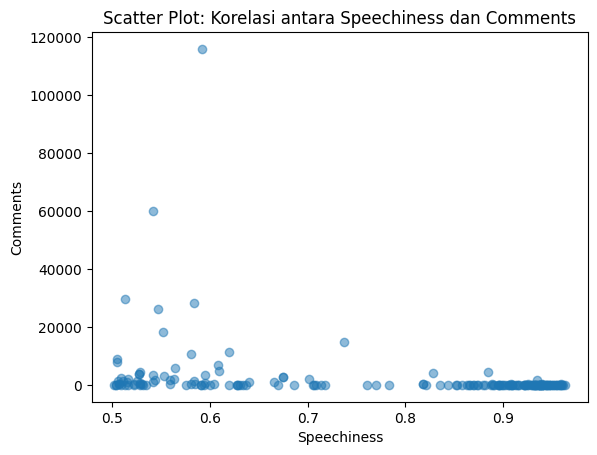

In [19]:
import matplotlib.pyplot as plt

high_speechiness_songs = spark_df.filter(col('Speechiness') > 0.5)

# Ambil data 'Speechiness' dan 'Comments' dari DataFrame 'high_speechiness_songs'
speechiness = high_speechiness_songs.select('Speechiness').rdd.flatMap(lambda x: x).collect()
comments = high_speechiness_songs.select('Comments').rdd.flatMap(lambda x: x).collect()


# Buat scatter plot
plt.scatter(speechiness, comments, alpha=0.5)
plt.xlabel('Speechiness')
plt.ylabel('Comments')
plt.title('Scatter Plot: Korelasi antara Speechiness dan Comments')

# Tampilkan scatter plot
plt.show()


### Analisa
Berdasarkan scatter plot diatas terlihat sebaran data tidak konsisten, artinya tidak ada korelasi antara banyaknya kata kata pada sebuah track dengan jumlah komentar pada youtube.

## Terapkan setidaknya 3 operasi RDD pada data tersebut seperti reduceByKey, sortByKey, flatMap, dll. lalu berikan analisisnya. ( SCPMK 1532205 point 10)

### Sebelum diproses saya melakukan drop kolom yang tidak diperlukan terlebih dahulu

In [20]:
columns_to_drop = ["Url_spotify", "Uri", "Url_youtube", "official_video", "Title", "Licensed"]
spark_df = spark_df.drop(*columns_to_drop)

In [21]:
rdd_data = spark_df.rdd

### reduceByKey

In [22]:
artist_comment_counts = rdd_data.map(lambda x: (x['Artist'], (x['Comments'], 1)))
total_comment_counts = artist_comment_counts.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
average_comments = total_comment_counts.map(lambda x: (x[0], x[1][0] / x[1][1]))
sorted_artists_by_comments = average_comments.sortBy(lambda x: x[1], ascending=False)
for i in sorted_artists_by_comments.take(10):
  print(i)

('BTS', 3954265.9)
('BLACKPINK', 1960502.7)
('Stray Kids', 845836.5)
('TWICE', 838498.5)
('PSY', 731160.8)
('Justin Bieber', 725912.0)
('EXO', 698195.0)
('Halsey', 698166.1)
('One Direction', 636089.2)
('Luis Fonsi', 470342.8)


### Analisa:
Pada kode diatas saya menggunakan reduceByKey untuk menghitung rata rata dari jumlah komen di youtube untuk setiap artist, bisa dilihat bahwa yang masuk top 10 dari hasil ini kebanyakan adalah artis k-pop, dan juga ada fakta bahwa gap rata rata nomor 1 ke nomor 2 terbilang cukup jauh, maka analisa saya adalah, para k-poper ini memang suka melakukan komentar pada kanal youtube artis favorite mereka

### sortByKey

In [23]:
# Mengurutkan data berdasarkan 'Views' secara descending
sorted_data = rdd_data.map(lambda x: (x['Views'], x)).sortByKey(ascending=False)

for i in sorted_data.take(5):
  print(i[1])

Row(Number=1147, Artist='Luis Fonsi', Track='Despacito', Album='VIDA', Album_type='album', Danceability=0.655, Energy=0.797, Key=2.0, Loudness=-4.787, Speechiness=0.153, Acousticness=0.198, Instrumentalness=0.0, Liveness=0.067, Valence=0.839, Tempo=177.928, Duration_ms=229360.0, Channel='LuisFonsiVEVO', Views=8079649362.0, Likes=50788652.0, Comments=4252791.0, Stream=1506598267.0)
Row(Number=365, Artist='Daddy Yankee', Track='Despacito', Album='VIDA', Album_type='album', Danceability=0.655, Energy=0.797, Key=2.0, Loudness=-4.787, Speechiness=0.153, Acousticness=0.198, Instrumentalness=0.0, Liveness=0.067, Valence=0.839, Tempo=177.928, Duration_ms=229360.0, Channel='LuisFonsiVEVO', Views=8079646911.0, Likes=50788626.0, Comments=4252791.0, Stream=1506598267.0)
Row(Number=12452, Artist='Ed Sheeran', Track='Shape of You', Album='÷ (Deluxe)', Album_type='album', Danceability=0.825, Energy=0.652, Key=1.0, Loudness=-3.183, Speechiness=0.0802, Acousticness=0.581, Instrumentalness=0.0, Liveness

### Analisa:
Kode diatas mengurutkan baris berdasarkan jumlah views pada platform youtube, jika dilihat dari hasilnya sepertinya tidak ada korelasi khusus antara kolom views dengan kolom lainnya, faktor yang mungkin dapat mempengaruhi views adalah popularitas dari artisnya dan juga sensasi keviralan lagunya.

### filter

In [24]:
ultra_danceable = rdd_data.filter(lambda x: x['Danceability'] > 0.9)

for i in ultra_danceable.take(10):
  print(i)

Row(Number=20, Artist='50 Cent', Track='In Da Club', Album="Get Rich Or Die Tryin'", Album_type='album', Danceability=0.902, Energy=0.72, Key=6.0, Loudness=-2.776, Speechiness=0.347, Acousticness=0.26, Instrumentalness=0.0, Liveness=0.0749, Valence=0.805, Tempo=90.059, Duration_ms=193467.0, Channel='50CentVEVO', Views=1682616458.0, Likes=10481678.0, Comments=296745.0, Stream=1041736808.0)
Row(Number=25, Artist='50 Cent', Track='Disco Inferno', Album='The Massacre', Album_type='album', Danceability=0.925, Energy=0.659, Key=3.0, Loudness=-4.763, Speechiness=0.231, Acousticness=0.206, Instrumentalness=7.88e-05, Liveness=0.279, Valence=0.71, Tempo=97.018, Duration_ms=214227.0, Channel='50CentVEVO', Views=39825951.0, Likes=382791.0, Comments=12038.0, Stream=202477187.0)
Row(Number=54, Artist='Daft Punk', Track='Around the World', Album='Homework', Album_type='album', Danceability=0.956, Energy=0.795, Key=7.0, Loudness=-5.311, Speechiness=0.15, Acousticness=0.00356, Instrumentalness=0.889, L

### Analisa:
Lagu-lagu dengan tingkat danceability tinggi dapat ditemukan di berbagai genre dan sering dikaitkan dengan artis-artis populer. Mereka cenderung memiliki video musik yang menarik, menghasilkan likes dan komentar, dan dapat memiliki tempo yang berbeda-beda. Danceability adalah elemen penting dalam menciptakan musik yang mendorong orang untuk bergerak dan menari, sehingga menjadikannya fitur yang berharga di industri musik.